# Trabalho 08 (AMAQ)

###      Professor: Keiji Yamanaka

#### Nome: Henrique Morais Jacob Medeiros
#### Matrícula: 

 Minimizar (otimizar) a função de Rosenbrock descrita abaixo utilizando o método de evolução diferencial:

$\sum_{i=1}^{D-1} (1-x_{i})^{2}+100(x_{i+1} - x_{i}^2)^2$

In [39]:
from mpl_toolkits import mplot3d
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [40]:
%matplotlib inline

## 1. Estruturação do programa
### 1.1 Inicialização dos parâmetros

* NP: Número da população utilizada
* NG: Quantidade de gerações
* CR: Taxa de crossover
* F = 0,5: Fator de escala

Para melhor utilização do programa, o usuário selecionará estes valores ao rodar o programa

In [41]:
npop = int(input('Digite a extensão da populaçao inicial')) #Numero da populaçao
ngen = int(input('Digite quantas geraçoes deseja obter')) # QTD de geraçoes
cr = float(input('Qual a probabilidade de cruzamento')) # Prob de cruzamento
dbound = float(input('Digite os valores de limite inferior')) # Limite inferior
ubound = float(input('Digite os valores de limite superior')) # Limite superior
f = 0.5 # fator de escala
x = np.array([np.linspace(-1,2),np.linspace(-1,2)]) # Espaço linear para plotagem do grafico em 3D
x1,x2 = np.meshgrid(x[0],x[1])


### 1.2 Definindo a função

Foi definido 2 funçoes, a funçao *func(x)* realiza o teste relativo lista contendo os pontos x1 e x2. A funçao *fcz(x1,x2)*, produz a matriz de resultados z para a plotagem dos graficos com a combinaçao dos pontos de x[0] (x1) e x[1] (x2).

In [42]:
def func (x): #Definiçao da função de Rosenbrock que recebe uma lista x = [x1,x2]
    d = len(x)
    soma = 0
    for i in range(d-1):
        soma += (1-x[i])**2 +(100*((x[i+1]-x[i]**2)**2))
    return soma

def fcz (x1,x2): # Funçao de Rosenbrock que recebe as matrizes x1,x2
    return (1-x1)**2 +(100*((x2-x1**2)**2))

z =  fcz(x1,x2)

def muta(c1,c2,c3):
    return c1+f*(c2+c3)


Text(0.5, 0, &#39;z&#39;)

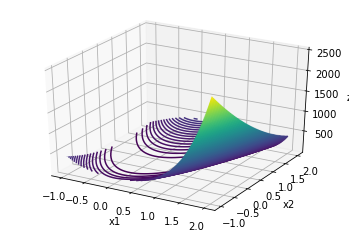

In [43]:
#plotagem da figura gerada a partir da funçao de rosembrock definida para x1 e x2 em [-1,2]

fig,ax = plt.subplots()
ax = plt.axes(projection = '3d')
ax.contour3D(x1,x2,z,100)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')


### 1.3 Produçao da "iézima" geraçao

Nesta parte ocorre a inicializaçao de algumas variaveis de auxilio e a faze de minimizaçao da funçao.

#### Fase de minimização:
Nesta fase, existem 2 loops, o mais externo controla qual geração está sendo calculada, e o interno que controla o ponto da populaçao da geração "i" escolhido (alvo)

In [44]:
qtd_var = int(input('Digite a quantidade de variaveis utilizadas'))
pop = np.random.uniform(dbound,ubound,(npop,qtd_var)) # gera populaçao inicial
popgeni = np.array(pop)  # Lista de população da iézima geração


In [45]:
for i in range(ngen):
    #if ngen-i < 10:
    print(f'geraçao {i}')
    popaux = np.array(popgeni) # Lista to keep track dos valores ja utilizados para aquela geraçao
    
    for p in range(npop): # Irá realizar o loop por todos os integrantes da populaçao até que a lista auxiliar esteja zerada
        escolhido = popaux[random.randint(0,len(popaux)-1)]
        indexaux = np.where(popaux == escolhido)[0][0] # Busca o index na lista auxiliar dos valores ainda nao escolhidos
        popaux = np.delete(popaux,indexaux,axis = 0) # Remove o valor já utilizado da lista auxiliar da população
        index = np.where(popgeni == escolhido)[0][0] # Busca o index do valor escolhido na lista da populaçao da geraçao 'i'
        
        
        #irá selecionar 3 candidatos distintos aleatórios da lista da geraçao atual
        randindex = random.sample(range(0,len(popgeni)-1),3)
        candidato1 = popgeni[randindex[0]]
        candidato2 = popgeni[randindex[1]]
        candidato3 = popgeni[randindex[2]]
        
        # Realiza a mutaçao dos candidatos escolhidos
        v = muta(candidato1,candidato2,candidato3)
        u = np.array(escolhido) 
        rj = np.random.uniform(0,1,(qtd_var)) # Gera o numero aleatório de 0 a 1 para cada variavel presente na populaçao
        for variavel in range(qtd_var): # Compara o valor de rj para atualizar o vetor de comparação
            if rj[variavel] <= cr:
                u[variavel] = v[variavel] # Atualiza o vetor u obtido a partir do crosover com 'v' e 'escolhido'
        if func(u) < func(escolhido): # Compara o resultado dos vetores na função de Rosenbrock e seleciona o menor valor.
            popgeni[index] = np.array(u) 
        elif func(escolhido) < func(u):
            popgeni[index] = np.array(escolhido)
        


geraçao 0
geraçao 1
geraçao 2
geraçao 3
geraçao 4
geraçao 5
geraçao 6
geraçao 7
geraçao 8
geraçao 9
geraçao 10
geraçao 11
geraçao 12
geraçao 13
geraçao 14
geraçao 15
geraçao 16
geraçao 17
geraçao 18
geraçao 19
geraçao 20
geraçao 21
geraçao 22
geraçao 23
geraçao 24
geraçao 25
geraçao 26
geraçao 27
geraçao 28
geraçao 29
geraçao 30
geraçao 31
geraçao 32
geraçao 33
geraçao 34
geraçao 35
geraçao 36
geraçao 37
geraçao 38
geraçao 39
geraçao 40
geraçao 41
geraçao 42
geraçao 43
geraçao 44
geraçao 45
geraçao 46
geraçao 47
geraçao 48
geraçao 49
geraçao 50
geraçao 51
geraçao 52
geraçao 53
geraçao 54
geraçao 55
geraçao 56
geraçao 57
geraçao 58
geraçao 59
geraçao 60
geraçao 61
geraçao 62
geraçao 63
geraçao 64
geraçao 65
geraçao 66
geraçao 67
geraçao 68
geraçao 69
geraçao 70
geraçao 71
geraçao 72
geraçao 73
geraçao 74
geraçao 75
geraçao 76
geraçao 77
geraçao 78
geraçao 79
geraçao 80
geraçao 81
geraçao 82
geraçao 83
geraçao 84
geraçao 85
geraçao 86
geraçao 87
geraçao 88
geraçao 89
geraçao 90
geraçao 9

## 2 Testes

### 2.1 Buscando o menor valor encontrado, e sua reespectiva coordenada.


In [46]:
zAdquiridos = fcz(popgeni[:,0],popgeni[:,1]) # Gera os valores adquiridos a partir da ultima geraçao
valorMinimo = np.min(zAdquiridos) # Busca o valor minimo gerado pela ultima geraçao
indexMinimo = np.where(zAdquiridos == valorMinimo)[0][0] # Busca o index do valor minimo na lista de valores adquiridos da ultima geração
print(f'Os valores utilizados foram:\nTamanho da população: {len(pop)}\nTaxa de crossover: {cr}\nFator de escala: {f}\nQuantidade de gerações: {ngen}')
print(f'Os pontos que geraram o menor valor de {valorMinimo}, foram {popgeni[indexMinimo]}')


Os valores utilizados foram:
Tamanho da população: 100
Taxa de crossover: 0.9
Fator de escala: 0.5
Quantidade de gerações: 1000
Os pontos que geraram o menor valor de 0.0009077006473910547, foram [1.01466162 1.02690622]


### 2.2 Plotagem interativa

A seguir, a plotagem interativa da funçao de Rosenbrock, pontos referentes a populaçao inicial, e dos pontos "minimizados".

*Para utilizar o recurso interativo, é necessário visualizar o arquivo em um jupyter notebook.*

In [47]:
# Defini a funçao de plotagem.
def plota(x1,x2,z,a=45,b=135, c = 'green'):
    fig,ax = plt.subplots()
    ax = plt.axes(projection = '3d')
    ax.scatter(x1,x2,z,color = c)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('z')
    ax.view_init(a,b)


interactive(children=(IntSlider(value=45, description=&#39;a&#39;, max=180, step=5), IntSlider(value=135, description=…

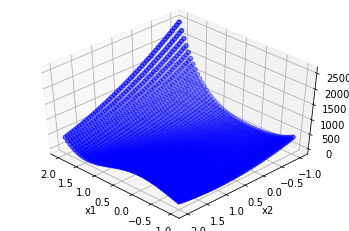

In [48]:
# Plotagem interativa da função de Rosenbrock
interact(plota,x1 = fixed(x1),x2 = fixed(x2),z = fixed(z), a =(0,180,5),b=(0,180,5),c = fixed('blue'))

plt.show(plota(x1,x2,z,45,135,'blue'))

interactive(children=(IntSlider(value=45, description=&#39;a&#39;, max=180, step=5), IntSlider(value=135, description=…

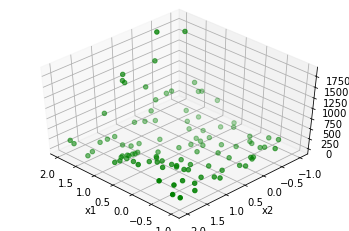

In [49]:
# Esta plotagem é referente a populaçao inicial escolhida, e seus valores quando atribuidos a função de Rosenbrock
interact(plota,x1 = fixed(pop[:,0]),x2 = fixed(pop[:,1]),z = fixed(fcz(pop[:,0],pop[:,1])), a =(0,180,5),b=(0,180,5),c = fixed('green'))

plt.show(plota(pop[:,0],pop[:,1],fcz(pop[:,0],pop[:,1]),45,135,'green'))

interactive(children=(IntSlider(value=45, description=&#39;a&#39;, max=180, step=5), IntSlider(value=135, description=…

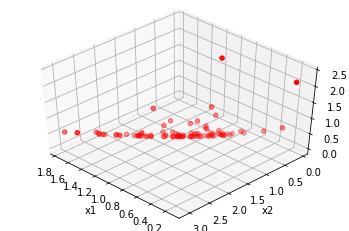

In [50]:
# Plotagem referente aos valores "minimizados", ou seja, os valores obtidos da ultima geração
interact(plota,x1 = fixed(popgeni[:,0]),x2 = fixed(popgeni[:,1]),z = fixed(fcz(popgeni[:,0],popgeni[:,1])), a =(0,180,5),b=(0,180,5),c = fixed('red'))

plt.show(plota(popgeni[:,0],popgeni[:,1],fcz(popgeni[:,0],popgeni[:,1]),45,135,'red'))

## Conclusão

A partir dos 2 ultimos graficos, podemos perceber que a evolução diferencial conseguiu realizar seu papel de minimizar a função, visto que os pontos se aproximaram cada vez mais do valor mínimo da função.
É notório o poder deste método quando comparamos os valores de Z, no grafico da população inicial, com os valores de z, no grafico da população da ultima geração